### Importing Required Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading The Data.

In [11]:
df=pd.read_csv('../data/gene_expression.csv',na_values=['NA','?'])

### Checking for Null Values.

In [12]:
df.isna().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

### Reading Top 5 rows of dataset.

In [14]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### plotting 3d plot using matplotlib.

In [13]:
from mpl_toolkits.mplot3d import Axes3D

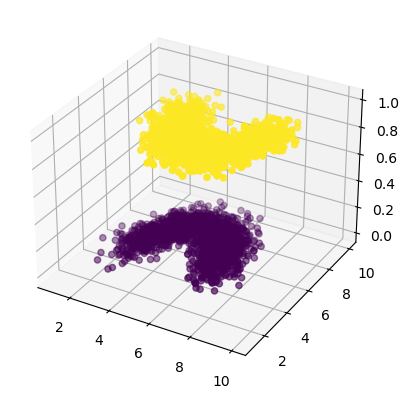

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Gene One'],df['Gene Two'],df['Cancer Present'],c=df['Cancer Present'])

### Splitting the dataset.

In [16]:
x=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

### transforming the data to have mean of 0 and standard deviation of 1.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### fitting the training data and predicting the test data

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
pred=knn.predict(X_test)

### Evaluation Metrics

In [30]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       423
           1       0.94      0.93      0.93       477

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



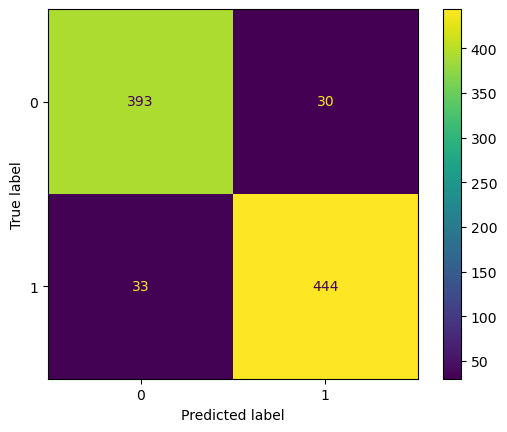

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

### Elbow method to find the number of neighbors. it would be best for model if number of neighbors are odd rather than even.

In [33]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    accuracy=1-accuracy_score(y_test,pred)
    error.append(accuracy)

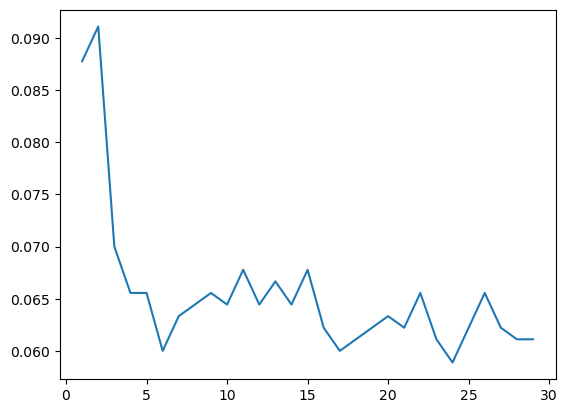

In [34]:
plt.plot(range(1,30),error)

### from the plot we can see that model at number of neighbors 7 reduced the error.

## Creating a pipeline

### pipeline is a sequence of data processing steps that are chained together to form a complete machine learning workflow.

In [35]:
from sklearn.pipeline import Pipeline

In [44]:
knn=KNeighborsClassifier()

In [45]:
scaler=StandardScaler()

In [46]:
operations=[('scaler',scaler),('knn',knn)]

In [47]:
pipe=Pipeline(operations)

In [48]:
k_values=list(range(1,30))

In [49]:
params={'knn__n_neighbors':k_values}

### using grid search to find best number of neighbors for KNN CLassifier.

### GridSearchCV works by searching over a user-specified grid of hyperparameters to find the combination that produces the best performance on a validation set. It performs an exhaustive search over all possible combinations of hyperparameters and uses cross-validation to estimate the generalization performance of each combination.

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid=GridSearchCV(pipe,param_grid=params)

In [52]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]})

In [53]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [54]:
pred=grid.predict(X_test)

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



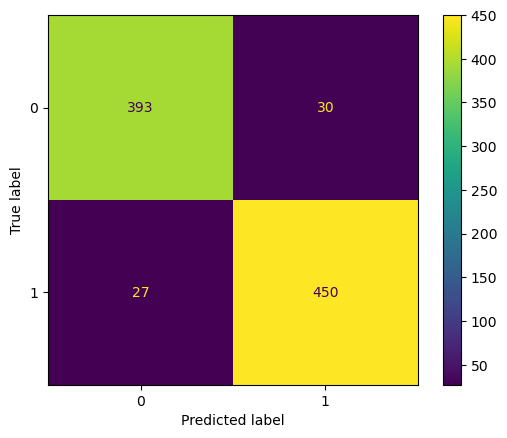

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)